# **AIN 214 - PA2 - FALL 2024**

**Student Number** : 2220765033

**Name Surname**   : Barış Çelik


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [1]:
# Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

Patients Table:

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| PatientID| INTEGER| PK      | Unique identifier for each patient       |
| FirstName      | TEXT|       | Patient's first name                    |
| LastName     | TEXT   |         | Patient's last name|
| Email     |  TEXT  |          |   Patient's email address      |



Doctors Table:

|Column|	Type|	Key	|Description|
|----------|-------|----------|------------------------------------------|
|DoctorID|	INTEGER|	PK |	Unique identifier for each doctor|
|DoctorName|	TEXT|		|Doctor's full name|
|Specialization|	TEXT|	|	Medical specialization of the doctor|
|DoctorContact|	TEXT|	|	Contact information for the doctor|



Appointments Table:

|Column|	Type|	Key	|Description|
|----------|-------|----------|------------------------------------------|
|AppointmentID|	INTEGER|	PK|	Unique identifier for each appointment|
|Date|	TEXT	|	|Appointment date|
|Time	|TEXT	|	|Appointment time|
|PatientID|	INTEGER|	FK|	Reference to the patient's ID in the Patients table|
|DoctorID|	INTEGER|	FK|	Reference to the doctor's ID in the Doctors table|
|ProcedureName|	TEXT|		|Description of the procedure or reason for the visit|
|FOREIGN KEY (PatientID) REFERENCES Patients(PatientID)	|		||||
|FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)	|	||||



Billing Table:


|Column|	Type|	Key|	Description|
|----------|-------|----------|------------------------------------------|
|InvoiceID|	TEXT|	PK|	Unique identifier for each invoice|
|PatientID|	INTEGER|	FK|	Reference to the patient's ID in the Patients table|
|Items|	TEXT|		|Description of items/services billed|
|Amount|	REAL|		|Total amount to be paid|
|FOREIGN KEY (PatientID) REFERENCES Patients(PatientID)||||	



In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Patients (
    PatientID INTEGER PRIMARY KEY,
    FirstName TEXT,
    LastName TEXT,
    Email TEXT
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Doctors (
    DoctorID INTEGER PRIMARY KEY,
    DoctorName TEXT,
    Specialization TEXT,
    DoctorContact TEXT
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Appointments (
    AppointmentID INTEGER PRIMARY KEY,
    Date TEXT,
    Time TEXT,
    PatientID INTEGER,
    DoctorID INTEGER,
    ProcedureName TEXT,
    FOREIGN KEY (PatientID) REFERENCES Patients(PatientID),
    FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Billing (
    InvoiceID TEXT PRIMARY KEY,
    PatientID INTEGER,
    Items TEXT,
    Amount REAL,
    FOREIGN KEY (PatientID) REFERENCES Patients(PatientID)
)
''')

conn.commit()

# Load data into Patients table
# I looked all rows and detected same patient id, So i dropped some rows 
patients_df = pd.read_csv('Data/Patient_billing.csv', usecols=['PatientID', 'firstname', 'lastname', 'email'])
patients_df.columns = ['PatientID', 'FirstName', 'LastName', 'Email']
patients_df = patients_df.drop_duplicates(subset=['PatientID'])
patients_df.to_sql('Patients', conn, if_exists='replace', index=False)

# Load data into Doctors table
doctors_df = pd.read_csv('Data/Doctors.csv', usecols=['DoctorID', 'DoctorName', 'Specialization', 'DoctorContact'])
doctors_df.columns = ['DoctorID', 'DoctorName', 'Specialization', 'DoctorContact']
doctors_df = doctors_df.drop_duplicates(subset=['DoctorID'])
doctors_df.to_sql('Doctors', conn, if_exists='replace', index=False)

# Load data into Appointments table with ProcedureName included directly
appointments_df = pd.read_csv('Data/Appointments_procedures.csv', usecols=['AppointmentID', 'Date', 'Time', 'PatientID', 'DoctorID', 'ProcedureName'])
appointments_df.to_sql('Appointments', conn, if_exists='replace', index=False)

# Load data into Billing table
billing_df = pd.read_csv('Data/Patient_billing.csv', usecols=['InvoiceID', 'PatientID', 'Items', 'Amount'])
billing_df.to_sql('Billing', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()


# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [3]:
conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

query = '''
SELECT d.DoctorID, d.DoctorName, COUNT(a.AppointmentID) AS total_appointments
FROM Doctors d
JOIN Appointments a ON d.DoctorID = a.DoctorID
GROUP BY d.DoctorID, d.DoctorName
ORDER BY total_appointments DESC
LIMIT 5;
'''

cursor.execute(query)
top_doctors = cursor.fetchall()

# Print the results
for doctor in top_doctors:
    print(f"DoctorID: {doctor[0]}, DoctorName: {doctor[1]}, Total Appointments: {doctor[2]}")

conn.close()


DoctorID: 548, DoctorName: Karlee, Total Appointments: 6
DoctorID: 417, DoctorName: Molli, Total Appointments: 5
DoctorID: 527, DoctorName: Cristabel, Total Appointments: 5
DoctorID: 637, DoctorName: Lorenza, Total Appointments: 5
DoctorID: 925, DoctorName: Hyacinthe, Total Appointments: 5


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [4]:
conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

query = '''
SELECT p.PatientID, p.FirstName,p.LastName, SUM(b.Amount) AS total_billed_amount
FROM Patients p
JOIN Billing b ON p.PatientID = b.PatientID
GROUP BY p.PatientID
ORDER BY total_billed_amount DESC;
'''

# Execute the query and fetch the results
cursor.execute(query)
billing_totals = cursor.fetchall()

# Print the results
for row in billing_totals:
    print(f"PatientID: {row[0]}, FirstName: {row[1]}, LastName: {row[2]}, Total Billed Amount: {row[3]}")

conn.close()

PatientID: 733, FirstName: Lesly, LastName: Arquit, Total Billed Amount: 4035149
PatientID: 368, FirstName: Stephanie, LastName: Agle, Total Billed Amount: 3436703
PatientID: 779, FirstName: Candi, LastName: Shaver, Total Billed Amount: 3283643
PatientID: 240, FirstName: Margette, LastName: Belldas, Total Billed Amount: 2800003
PatientID: 242, FirstName: Frieda, LastName: Bonilla, Total Billed Amount: 2286000
PatientID: 879, FirstName: Mildrid, LastName: Bakerman, Total Billed Amount: 2285920
PatientID: 373, FirstName: Asia, LastName: Bendick, Total Billed Amount: 2281671
PatientID: 804, FirstName: Madelle, LastName: Camden, Total Billed Amount: 2219170
PatientID: 566, FirstName: Rebeca, LastName: Winnick, Total Billed Amount: 2213831
PatientID: 546, FirstName: Aimil, LastName: Suzetta, Total Billed Amount: 2173939
PatientID: 744, FirstName: Averyl, LastName: Hutchison, Total Billed Amount: 2150565
PatientID: 291, FirstName: Roz, LastName: Oster, Total Billed Amount: 2058340
PatientID:

# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [5]:
conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

query = '''
SELECT d.DoctorID, d.DoctorName, a.ProcedureName, COUNT(a.ProcedureName) AS procedure_count
FROM Doctors d
JOIN Appointments a ON d.DoctorID = a.DoctorID
GROUP BY d.DoctorID, d.DoctorName
ORDER BY d.DoctorID, procedure_count DESC;
'''

# Execute the query and fetch the results
cursor.execute(query)
procedure_counts = cursor.fetchall()

# Print the results
for row in procedure_counts:
    print(f"DoctorID: {row[0]}, DoctorName: {row[1]}, ProcedureName: {row[2]}, ProcedureCount: {row[3]}")

conn.close()

DoctorID: 101, DoctorName: Mireielle, ProcedureName: General surgery, ProcedureCount: 1
DoctorID: 117, DoctorName: Karena, ProcedureName: Anesthetic care during childbirth, ProcedureCount: 3
DoctorID: 119, DoctorName: Flory, ProcedureName: Pediatric surgery, ProcedureCount: 2
DoctorID: 120, DoctorName: Lilith, ProcedureName: Intensive care management, ProcedureCount: 1
DoctorID: 129, DoctorName: Aurelie, ProcedureName: Hemodynamic monitoring, ProcedureCount: 1
DoctorID: 139, DoctorName: Aurelie, ProcedureName: Allergy testing, ProcedureCount: 1
DoctorID: 147, DoctorName: Shaylyn, ProcedureName: Intensive care management, ProcedureCount: 2
DoctorID: 151, DoctorName: Karly, ProcedureName: Emergency surgical procedures, ProcedureCount: 2
DoctorID: 154, DoctorName: Leanna, ProcedureName: General anesthesia for surgeries, ProcedureCount: 1
DoctorID: 155, DoctorName: Alleen, ProcedureName: Retinal surgery, ProcedureCount: 1
DoctorID: 165, DoctorName: Monika, ProcedureName: General surgery, P

# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [6]:
"""
My output wrong, I calculated manually and found issue. If a doctor did just one appointment to a patient who had 
2 appointment, my code calculates both. I need to match Items from patient_billing and procedurename from 
appoipment procedure.
"""

conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

query = '''
SELECT d.DoctorID, d.DoctorName, SUM(b.Amount) AS total_revenue
FROM Doctors d
JOIN Appointments a ON d.DoctorID = a.DoctorID
JOIN Billing b ON b.PatientID = a.PatientID 
GROUP BY d.DoctorID
ORDER BY total_revenue DESC;
'''


# Execute the query and fetch all results
cursor.execute(query)
doctor_revenue = cursor.fetchall()

# Print each row in the result
if doctor_revenue:
    for row in doctor_revenue:
        print(f"DoctorID: {row[0]}, DoctorName: {row[1]}, Total Revenue: {row[2]}")
else:
    print("No data found.")

conn.close()

DoctorID: 452, DoctorName: Minne, Total Revenue: 7029997
DoctorID: 189, DoctorName: Max, Total Revenue: 6567286
DoctorID: 617, DoctorName: Charissa, Total Revenue: 5473767
DoctorID: 975, DoctorName: Hettie, Total Revenue: 4347878
DoctorID: 558, DoctorName: Adriana, Total Revenue: 3759756
DoctorID: 237, DoctorName: Suzette, Total Revenue: 3580216
DoctorID: 801, DoctorName: Brooks, Total Revenue: 3436703
DoctorID: 407, DoctorName: Bill, Total Revenue: 3436703
DoctorID: 243, DoctorName: Edith, Total Revenue: 3436703
DoctorID: 637, DoctorName: Lorenza, Total Revenue: 3183401
DoctorID: 197, DoctorName: Ofilia, Total Revenue: 3172966
DoctorID: 943, DoctorName: Doro, Total Revenue: 2875010
DoctorID: 485, DoctorName: Tera, Total Revenue: 2764512
DoctorID: 486, DoctorName: Janis, Total Revenue: 2533050
DoctorID: 224, DoctorName: Dorene, Total Revenue: 2479084
DoctorID: 430, DoctorName: Eolanda, Total Revenue: 2389798
DoctorID: 548, DoctorName: Karlee, Total Revenue: 2291637
DoctorID: 129, Docto

# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [7]:
conn = sqlite3.connect('healthcare_management.db')
cursor = conn.cursor()

query = '''
SELECT p.PatientID, p.FirstName, p.LastName, COUNT(a.AppointmentID) AS appointment_count
FROM Patients p
JOIN Appointments a ON p.PatientID = a.PatientID
GROUP BY p.PatientID, p.FirstName, p.LastName
HAVING COUNT(a.AppointmentID) > 1
ORDER BY appointment_count DESC;
'''

# Execute the query and fetch the results
cursor.execute(query)
patients_with_multiple_appointments = cursor.fetchall()

# Print the results
for row in patients_with_multiple_appointments:
    print(f"PatientID: {row[0]}, FirstName: {row[1]}, LastName: {row[2]}, Appointment Count: {row[3]}")

conn.close()

PatientID: 870, FirstName: Carolina, LastName: Carbo, Appointment Count: 6
PatientID: 368, FirstName: Stephanie, LastName: Agle, Appointment Count: 5
PatientID: 469, FirstName: Ashlee, LastName: Annabella, Appointment Count: 5
PatientID: 613, FirstName: Zia, LastName: Wildermuth, Appointment Count: 5
PatientID: 696, FirstName: Grier, LastName: Noam, Appointment Count: 5
PatientID: 149, FirstName: Drucie, LastName: Nedrud, Appointment Count: 4
PatientID: 190, FirstName: Amara, LastName: Sawtelle, Appointment Count: 4
PatientID: 381, FirstName: Chickie, LastName: Hazlett, Appointment Count: 4
PatientID: 717, FirstName: Tybie, LastName: Latini, Appointment Count: 4
PatientID: 977, FirstName: Carree, LastName: Bach, Appointment Count: 4
PatientID: 260, FirstName: Brynna, LastName: Ahab, Appointment Count: 3
PatientID: 281, FirstName: Marguerite, LastName: Silvan, Appointment Count: 3
PatientID: 339, FirstName: Mellicent, LastName: Viddah, Appointment Count: 3
PatientID: 404, FirstName: Mer

# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

In [14]:
# Load your data into a DataFrame
data = pd.read_csv('Data/Suicides.csv')

# Create the pivot table
pivot_table = data.pivot_table(
    values='suicides/100k pop',
    index='country',
    columns='year',
    aggfunc='mean'
)

# Calculate average suicide rate by country and year
avg_suicide_rate = pivot_table.mean(axis=1).sort_values(ascending=False)

# Display the pivot table and the countries with highest and lowest average suicide rates
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 
print("Pivot Table, Average Suicide Rate by Country and Year:")
print(pivot_table)

print("\nTop 5 Countries with the Highest Average Suicide Rates:")
print(avg_suicide_rate.head())

sorted_average_suicide_rate = avg_suicide_rate.sort_values(ascending=True)

# Display the top 5 countries with the lowest average suicide rates
print("Top 5 Countries with the Lowest Average Suicide Rates:")
print(sorted_average_suicide_rate.head())

# ANALYZING DATA
"""
With this pivot table, you’ll be able to:

1) We can't say suicide rate increase by time. Sometimes decreasing sometimes increasing.
2) I inspected all years to find spesific year. But I couldnt see big changes for all country. 
3) Dominica and "Saint Kitts and Nevis"s suicide rate are 0. That can't be true in real life. Probably government in these
countries are not detecting suicide rate appropriatly. Or, If detecting correctly that sounds good.


"""


Pivot Table, Average Suicide Rate by Country and Year:
year                               1985       1986       1987       1988  \
country                                                                    
Albania                             NaN        NaN   2.654167   2.705000   
Antigua and Barbuda            0.000000   0.000000   0.000000   0.000000   
Argentina                     11.205833  12.741667  12.081667  12.186667   
Armenia                             NaN        NaN        NaN        NaN   
Aruba                               NaN        NaN        NaN        NaN   
Australia                     13.617500  14.649167  15.735000  14.943333   
Austria                       32.067500  33.483333  33.823333  29.803333   
Azerbaijan                          NaN        NaN        NaN        NaN   
Bahamas                        0.396667        NaN   1.132500        NaN   
Bahrain                        1.676667        NaN   2.140000   2.066667   
Barbados                       5.

'\nWith this pivot table, you’ll be able to:\n\n1) We can\'t say suicide rate increase by time. Sometimes decreasing sometimes increasing.\n2) I inspected all years to find spesific year. But I couldnt see big changes for all country. \n3) Dominica and "Saint Kitts and Nevis"s suicide rate are 0. That can\'t be true in real life. Probably government in these\ncountries are not detecting suicide rate appropriatly. Or, If detecting correctly that sounds good.\n\n\n'

# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

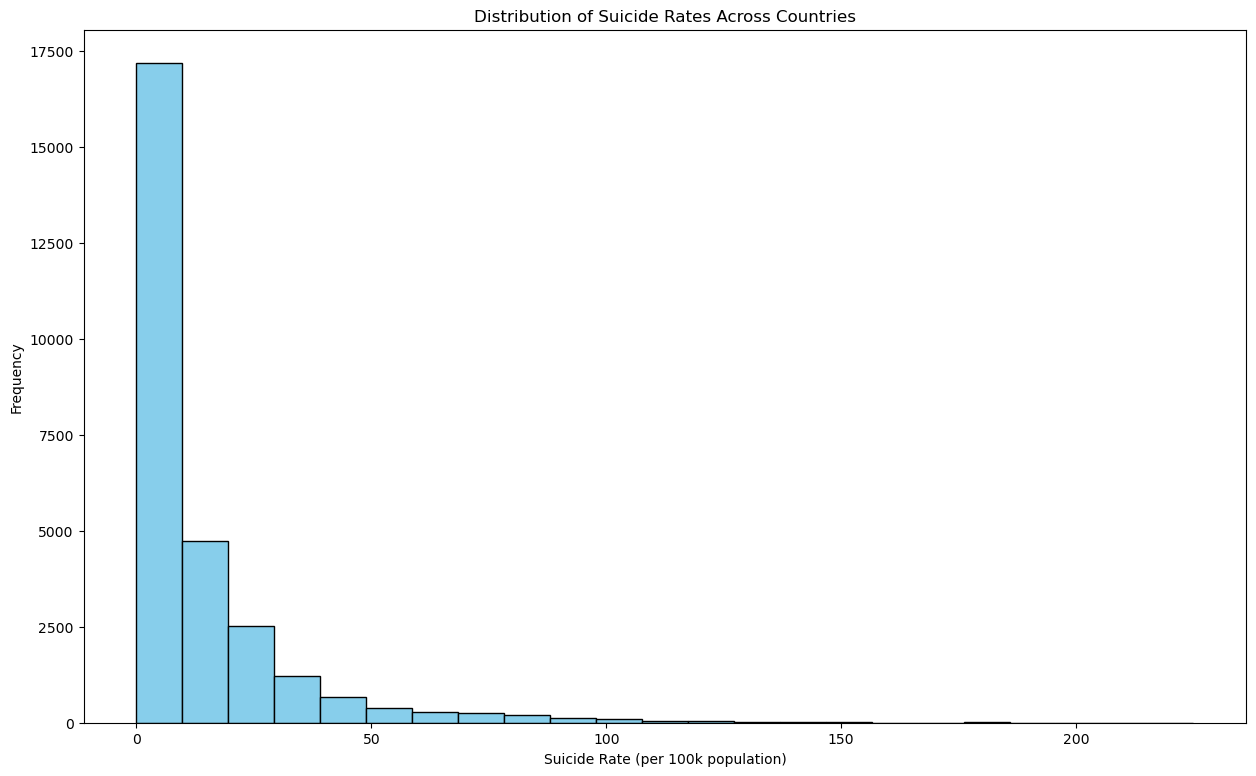

'\n\nThe suicide rates of the first 10 countries are much higher than other countries. Suicide rates decreasing while \nnumber of country is increasing.\n1) Most countries have low suicide rates.\n\n'

In [9]:
# Plot the histogram for the 'suicides/100k pop' column
plt.figure(figsize=(15, 9))
plt.hist(data['suicides/100k pop'].dropna(), bins=23, edgecolor='black', color='skyblue')

# Add labels and title
plt.title('Distribution of Suicide Rates Across Countries')
plt.xlabel('Suicide Rate (per 100k population)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# COMMENT ON THE FINDINGS

"""

The suicide rates of the first 10 countries are much higher than other countries. Suicide rates decreasing while 
number of country is increasing.
1) Most countries have low suicide rates.

"""



# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

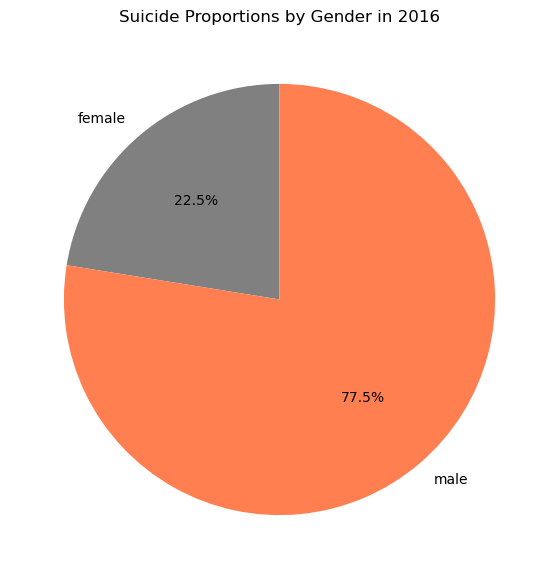

"\n\nMen have a higher suicide rate than women. But we can't say that fits for all countries.\nDifference is high. Generally, men tend to have higher suicide rates than women\n\n\n"

In [10]:
#get the most recent year from the dataset
most_recent_year = data['year'].max()

# filter the data for the most recent year
recent_data = data[data['year'] == most_recent_year]

# group the data by gender and sum the suicides for each gender
gender_suicide_totals = recent_data.groupby('sex')['suicides_no'].sum()

#create a pie chart
plt.figure(figsize=(7, 7))
gender_suicide_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gray', 'coral'])
plt.title(f'Suicide Proportions by Gender in {most_recent_year}')
plt.ylabel('')  # Remove the y-label for cleaner visualization
plt.show()



"""

Men have a higher suicide rate than women. But we can't say that fits for all countries.
Difference is high. Generally, men tend to have higher suicide rates than women


"""


# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

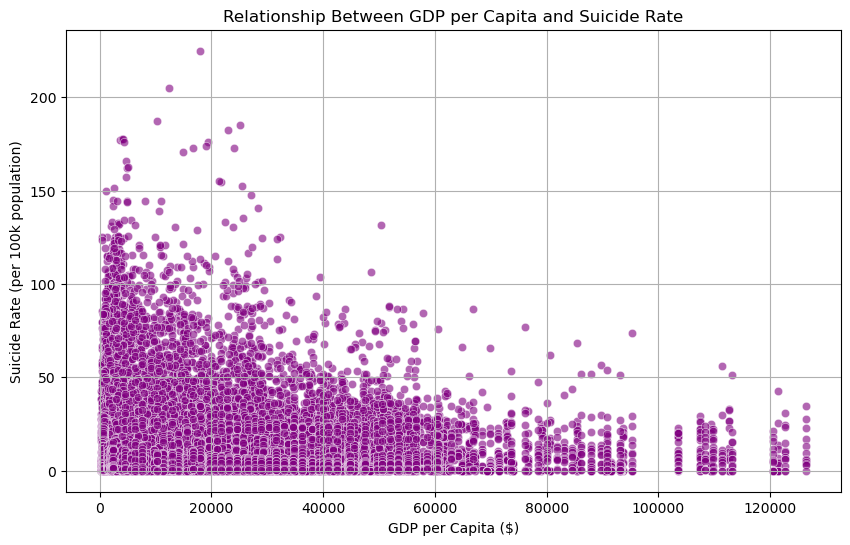

'\n\nCountries that have higher suicide rate are mostly less wealthy countries. That can be cause  be less social isolation,\ndifferent mental health reporting standards, or other socio-cultural factors.\nThere are a few outliers with high suicide rates even at higher GDP levels, though these are rare.\n\n\n'

In [11]:
# clean the data
data['gdp_per_capita ($)'] = pd.to_numeric(data['gdp_per_capita ($)'], errors='coerce')
data['suicides/100k pop'] = pd.to_numeric(data['suicides/100k pop'], errors='coerce')

# drop rows with missing values in the columns we are interested in
scatter_data = data.dropna(subset=['gdp_per_capita ($)', 'suicides/100k pop'])

# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=scatter_data, color='purple', alpha=0.6)

# Adding labels and title
plt.title('Relationship Between GDP per Capita and Suicide Rate')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicide Rate (per 100k population)')
plt.grid(True)
plt.show()




"""

Countries that have higher suicide rate are mostly less wealthy countries. That can be cause  be less social isolation,
different mental health reporting standards, or other socio-cultural factors.
There are a few outliers with high suicide rates even at higher GDP levels, though these are rare.


"""


# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

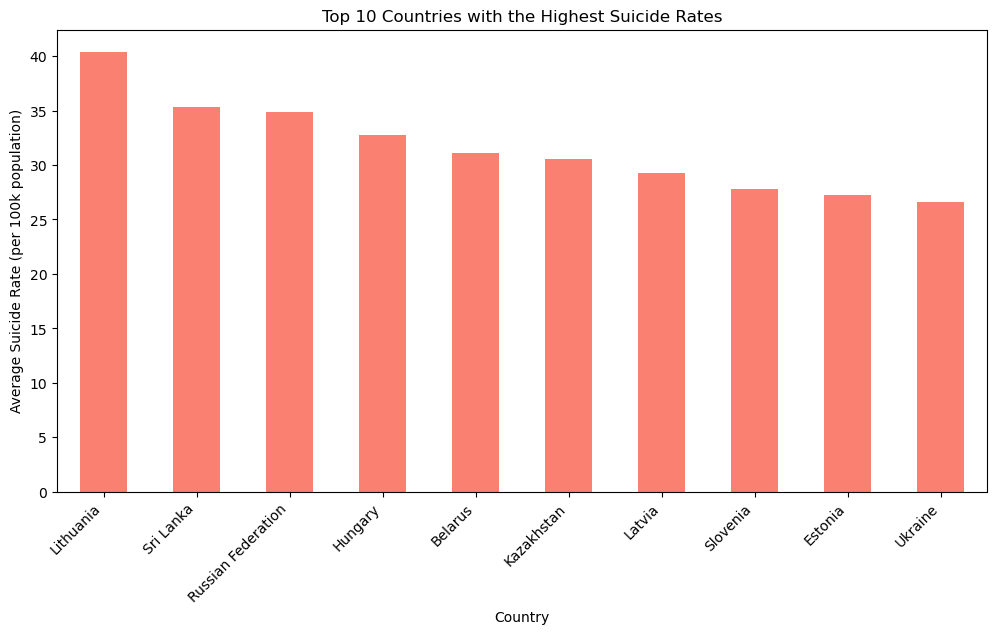

'\nThose countries in east europe. Mostly slavic countries.\n\n'

In [12]:
#group the data by country and sum the suicide rates for each country
country_suicide_rate = data.groupby('country')['suicides/100k pop'].mean()

# sort the countries by suicide rate in descending order and get the top 10
top_10_countries = country_suicide_rate.sort_values(ascending=False).head(10)

# create the bar chart
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='salmon')

# adding labels and title
plt.title('Top 10 Countries with the Highest Suicide Rates')
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.xticks(rotation=45, ha='right')  # Rotate country names for readability
plt.show()


# ANALYZE

"""
Those countries in east europe. Mostly slavic countries.

"""


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.